# Correlation Analysis (Hourly Data)

## Load Data

In [1]:
import polars as pl
from src.energy_forecast.config import PROCESSED_DATA_DIR

df_hourly = pl.read_csv(PROCESSED_DATA_DIR / "building_hourly_72_72.csv").with_columns(pl.col("datetime").str.to_datetime())
df_hourly

2025-06-17 09:08:36.227 | INFO     | src.energy_forecast.config:<module>:15 - PROJ_ROOT path is: /home/marja/PycharmProjects/energy-forecast-wahl


shape: (142_085, 176)
┌─────────────┬─────────────┬──────┬──────┬───┬─────────────┬────────────┬────────────┬────────────┐
│ id          ┆ datetime    ┆ diff ┆ prcp ┆ … ┆ weekday_sin ┆ weekday_co ┆ day_of_mon ┆ day_of_mon │
│ ---         ┆ ---         ┆ ---  ┆ ---  ┆   ┆ ---         ┆ s          ┆ th_sin     ┆ th_cos     │
│ str         ┆ datetime[μs ┆ f64  ┆ f64  ┆   ┆ f64         ┆ ---        ┆ ---        ┆ ---        │
│             ┆ ]           ┆      ┆      ┆   ┆             ┆ f64        ┆ f64        ┆ f64        │
╞═════════════╪═════════════╪══════╪══════╪═══╪═════════════╪════════════╪════════════╪════════════╡
│ 841ccf85-04 ┆ 2022-10-22  ┆ 2.0  ┆ 0.0  ┆ … ┆ 1.0         ┆ 6.1232e-17 ┆ -0.5       ┆ 0.866025   │
│ b7-11ec-9d6 ┆ 13:00:00    ┆      ┆      ┆   ┆             ┆            ┆            ┆            │
│ 1-02b402…   ┆             ┆      ┆      ┆   ┆             ┆            ┆            ┆            │
│ 841ccf85-04 ┆ 2022-10-22  ┆ 1.0  ┆ 0.0  ┆ … ┆ 1.0         ┆ 6.1232e-17 ┆ -0.5       ┆ 0.866025   │
│ b7-11ec-9d6 ┆ 14:00:00    ┆      ┆      ┆   ┆             ┆            ┆            ┆            │
│ 1-02b402…   ┆             ┆      ┆      ┆   ┆             ┆            ┆            ┆            │
│ 841ccf85-04 ┆ 2022-10-22  ┆ 3.0  ┆ 0.0  ┆ … ┆ 1.0         ┆ 6.1232e-17 ┆ -0.5       ┆ 0.866025   │
│ b7-11ec-9d6 ┆ 15:00:00    ┆      ┆      ┆   ┆             ┆            ┆            ┆            │
│ 1-02b402…   ┆             ┆      ┆      ┆   ┆             ┆            ┆            ┆            │
│ 841ccf85-04 ┆ 2022-10-22  ┆ 2.0  ┆ 0.0  ┆ … ┆ 1.0         ┆ 6.1232e-17 ┆ -0.5       ┆ 0.866025   │
│ b7-11ec-9d6 ┆ 16:00:00    ┆      ┆      ┆   ┆             ┆            ┆            ┆            │
│ 1-02b402…   ┆             ┆      ┆      ┆   ┆             ┆            ┆            ┆            │
│ 841ccf85-04 ┆ 2022-10-22  ┆ 24.0 ┆ 0.0  ┆ … ┆ 1.0         ┆ 6.1232e-17 ┆ -0.5       ┆ 0.866025   │
│ b7-11ec-9d6 ┆ 17:00:00    ┆      ┆      ┆   ┆             ┆            ┆            ┆            │
│ 1-02b402…   ┆             ┆      ┆      ┆   ┆             ┆            ┆            ┆            │
│ …           ┆ …           ┆ …    ┆ …    ┆ … ┆ …           ┆ …          ┆ …          ┆ …          │
│ bf254b46-e0 ┆ 2023-09-09  ┆ 1.13 ┆ 0.0  ┆ … ┆ 1.0         ┆ 6.1232e-17 ┆ 0.707107   ┆ -0.707107  │
│ 09-11eb-9d6 ┆ 11:00:00    ┆      ┆      ┆   ┆             ┆            ┆            ┆            │
│ 1-02b402…   ┆             ┆      ┆      ┆   ┆             ┆            ┆            ┆            │
│ bf254b46-e0 ┆ 2023-09-09  ┆ 0.0  ┆ 0.0  ┆ … ┆ 1.0         ┆ 6.1232e-17 ┆ 0.707107   ┆ -0.707107  │
│ 09-11eb-9d6 ┆ 12:00:00    ┆      ┆      ┆   ┆             ┆            ┆            ┆            │
│ 1-02b402…   ┆             ┆      ┆      ┆   ┆             ┆            ┆            ┆            │
│ bf254b46-e0 ┆ 2023-09-09  ┆ 0.0  ┆ 0.0  ┆ … ┆ 1.0         ┆ 6.1232e-17 ┆ 0.707107   ┆ -0.707107  │
│ 09-11eb-9d6 ┆ 13:00:00    ┆      ┆      ┆   ┆             ┆            ┆            ┆            │
│ 1-02b402…   ┆             ┆      ┆      ┆   ┆             ┆            ┆            ┆            │
│ bf254b46-e0 ┆ 2023-09-09  ┆ 0.0  ┆ 0.0  ┆ … ┆ 1.0         ┆ 6.1232e-17 ┆ 0.707107   ┆ -0.707107  │
│ 09-11eb-9d6 ┆ 14:00:00    ┆      ┆      ┆   ┆             ┆            ┆            ┆            │
│ 1-02b402…   ┆             ┆      ┆      ┆   ┆             ┆            ┆            ┆            │
│ bf254b46-e0 ┆ 2023-09-09  ┆ 0.0  ┆ 0.0  ┆ … ┆ 1.0         ┆ 6.1232e-17 ┆ 0.707107   ┆ -0.707107  │
│ 09-11eb-9d6 ┆ 15:00:00    ┆      ┆      ┆   ┆             ┆            ┆            ┆            │
│ 1-02b402…   ┆             ┆      ┆      ┆   ┆             ┆            ┆            ┆            │
└─────────────┴─────────────┴──────┴──────┴───┴─────────────┴────────────┴────────────┴────────────┘

## Attributes and Description

In [2]:
from src.energy_forecast.config import FEATURE_SET_15

attributes = ["diff", "prcp", "snow", "wdir", "wspd", "wpgt", "pres", "tsun", "daily_avg", "heated_area", "weekend", "holiday", "temp", "dwpt", "rhum", "coco", "typ_0", "typ_1", "typ_2", "typ_4", "primary_energy_district heating", "primary_energy_gas", "weekday_sin", "weekday_cos", "day_of_month_sin", "day_of_month_cos"]
attributes_avg = attributes + ["daily_avg"]
attributes_ha = attributes + ["heated_area", "anzahlwhg"]

From the [meteostat](https://dev.meteostat.net/python/daily.html#api) documentation:

Column	Description	Type

station	The Meteostat ID of the weather station (only if query refers to multiple stations)	String

time	The datetime of the observation	Datetime64

temp	The air temperature in °C	Float64

dwpt	The dew point in °C	Float64

rhum	The relative humidity in percent (%)	Float64

prcp	The one hour precipitation total in mm	Float64

snow	The snow depth in mm	Float64

wdir	The average wind direction in degrees (°)	Float64

wspd	The average wind speed in km/h	Float64

wpgt	The peak wind gust in km/h	Float64

pres	The average sea-level air pressure in hPa	Float64

tsun	The one hour sunshine total in minutes (m)	Float64

coco	The weather condition code	Float64

Further Attributes apart from weather data:

- holiday: whether or not (0/1) there is a holiday in the state of the record on this datetime
- heated_area: heated area in square metres
- anzahlwhg: number of appartments in the building
- weekend: boolean
- weekday_sin/cos: sine and cosine encoded weekday (1-7)
- day_of_month_sin/cos: sine and cosine encoded day of month (1-31)
- primary_energy_district_heating/gas: type of energy
- typ_0/1/2/4: type of building (appartments/...)

## Multiple Linear Regression with OLS

### All data (gas + district heating)

In [3]:
import statsmodels.api as sm


def get_p_vals(df: pl.DataFrame, list_cols: list):
    attr_list = list(set(list_cols) - {"diff"})
    df = df.drop_nulls(list_cols)
    X = df.select(attr_list).to_numpy()
    print("Sample size:", X.shape[0])
    y = df.select(pl.col("diff")).to_numpy()
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    return est2, est2.rsquared, est2.rsquared_adj, est2.summary2().tables[1]["Coef."], est2.summary2().tables[1][
        "P>|t|"].tolist()


significance_level = 0.05


def get_significant_features(df, attributes):
    est, rsquared, rsquared_adj, coeffs, p_vals = get_p_vals(df, attributes)
    print("r²: ", rsquared)
    print("r² adjusted: ", rsquared_adj)
    print("Removing following attributes:")
    print(pl.DataFrame({"attributes": attributes, "p-value": p_vals, "coeffs": coeffs}).filter(pl.col("p-value") > significance_level))
    return pl.DataFrame({"attributes": attributes, "p-value": p_vals, "coeffs": coeffs}).sort("p-value").filter(
        pl.col("p-value") < significance_level)


def iterative_feature_removal(df, attributes):
    print(f"Starting with {len(attributes)} features: {attributes}")
    for i in range(5):
        print(f"Computing r² and p-values for {len(attributes)} features: {attributes}")
        df_significant_feat = get_significant_features(df, attributes)
        print(f"{len(df_significant_feat)} significant features: ")
        for row in df_significant_feat.iter_rows():
            print(row)
        print("\n")
        attributes = df_significant_feat["attributes"].to_list()
        if "diff" not in attributes: attributes.append("diff")


iterative_feature_removal(df_hourly, attributes)

Starting with 26 features: ['diff', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun', 'daily_avg', 'heated_area', 'weekend', 'holiday', 'temp', 'dwpt', 'rhum', 'coco', 'typ_0', 'typ_1', 'typ_2', 'typ_4', 'primary_energy_district heating', 'primary_energy_gas', 'weekday_sin', 'weekday_cos', 'day_of_month_sin', 'day_of_month_cos']
Computing r² and p-values for 26 features: ['diff', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun', 'daily_avg', 'heated_area', 'weekend', 'holiday', 'temp', 'dwpt', 'rhum', 'coco', 'typ_0', 'typ_1', 'typ_2', 'typ_4', 'primary_energy_district heating', 'primary_energy_gas', 'weekday_sin', 'weekday_cos', 'day_of_month_sin', 'day_of_month_cos']
Sample size: 142085
r²:  0.5599644134760744
r² adjusted:  0.5598931707107127
Removing following attributes:
shape: (1, 3)
┌────────────┬──────────┬───────────┐
│ attributes ┆ p-value  ┆ coeffs    │
│ ---        ┆ ---      ┆ ---       │
│ str        ┆ f64      ┆ f64       │
╞════════════╪══════════╪═══════════

With all features, we achieve an r-squared value of about 0.55996. All features are deemed as significant, but weekday_sin. After iteratively removing weekday_sin, wdir, wspd, weekday_cos, r-squared is only slightly smaller with 0.559894.

In [4]:
get_significant_features(df_hourly, list(set(attributes) - {"heated_area", "weekend", "holiday", "typ_0", "typ_1", "typ_2", "typ_4", "primary_energy_district heating", "primary_energy_gas", "weekday_sin", "weekday_cos", "day_of_month_sin", "day_of_month_cos"}))

Sample size: 142085
r²:  0.5533108085120274
r² adjusted:  0.5532730792599732
Removing following attributes:
shape: (1, 3)
┌────────────┬──────────┬───────────┐
│ attributes ┆ p-value  ┆ coeffs    │
│ ---        ┆ ---      ┆ ---       │
│ str        ┆ f64      ┆ f64       │
╞════════════╪══════════╪═══════════╡
│ rhum       ┆ 0.251128 ┆ -0.053621 │
└────────────┴──────────┴───────────┘


shape: (12, 3)
┌────────────┬─────────────┬───────────┐
│ attributes ┆ p-value     ┆ coeffs    │
│ ---        ┆ ---         ┆ ---       │
│ str        ┆ f64         ┆ f64       │
╞════════════╪═════════════╪═══════════╡
│ coco       ┆ 0.0         ┆ -9.367268 │
│ pres       ┆ 0.0         ┆ 1.72107   │
│ daily_avg  ┆ 0.0         ┆ 0.969144  │
│ temp       ┆ 3.3589e-224 ┆ -0.557195 │
│ wpgt       ┆ 1.7796e-159 ┆ 3.906192  │
│ …          ┆ …           ┆ …         │
│ prcp       ┆ 8.9470e-28  ┆ 0.284013  │
│ wdir       ┆ 1.0101e-9   ┆ 0.052037  │
│ tsun       ┆ 9.1712e-7   ┆ -1.665646 │
│ dwpt       ┆ 0.000003    ┆ 0.276901  │
│ snow       ┆ 0.000356    ┆ 0.005589  │
└────────────┴─────────────┴───────────┘

With only weather information, the $r^2$ value reduces to 0.55331.

In [5]:
import plotly.express as px

fig = px.imshow(df_hourly.drop_nulls(["daily_avg"]).select(attributes).to_pandas().corr())
fig.show()

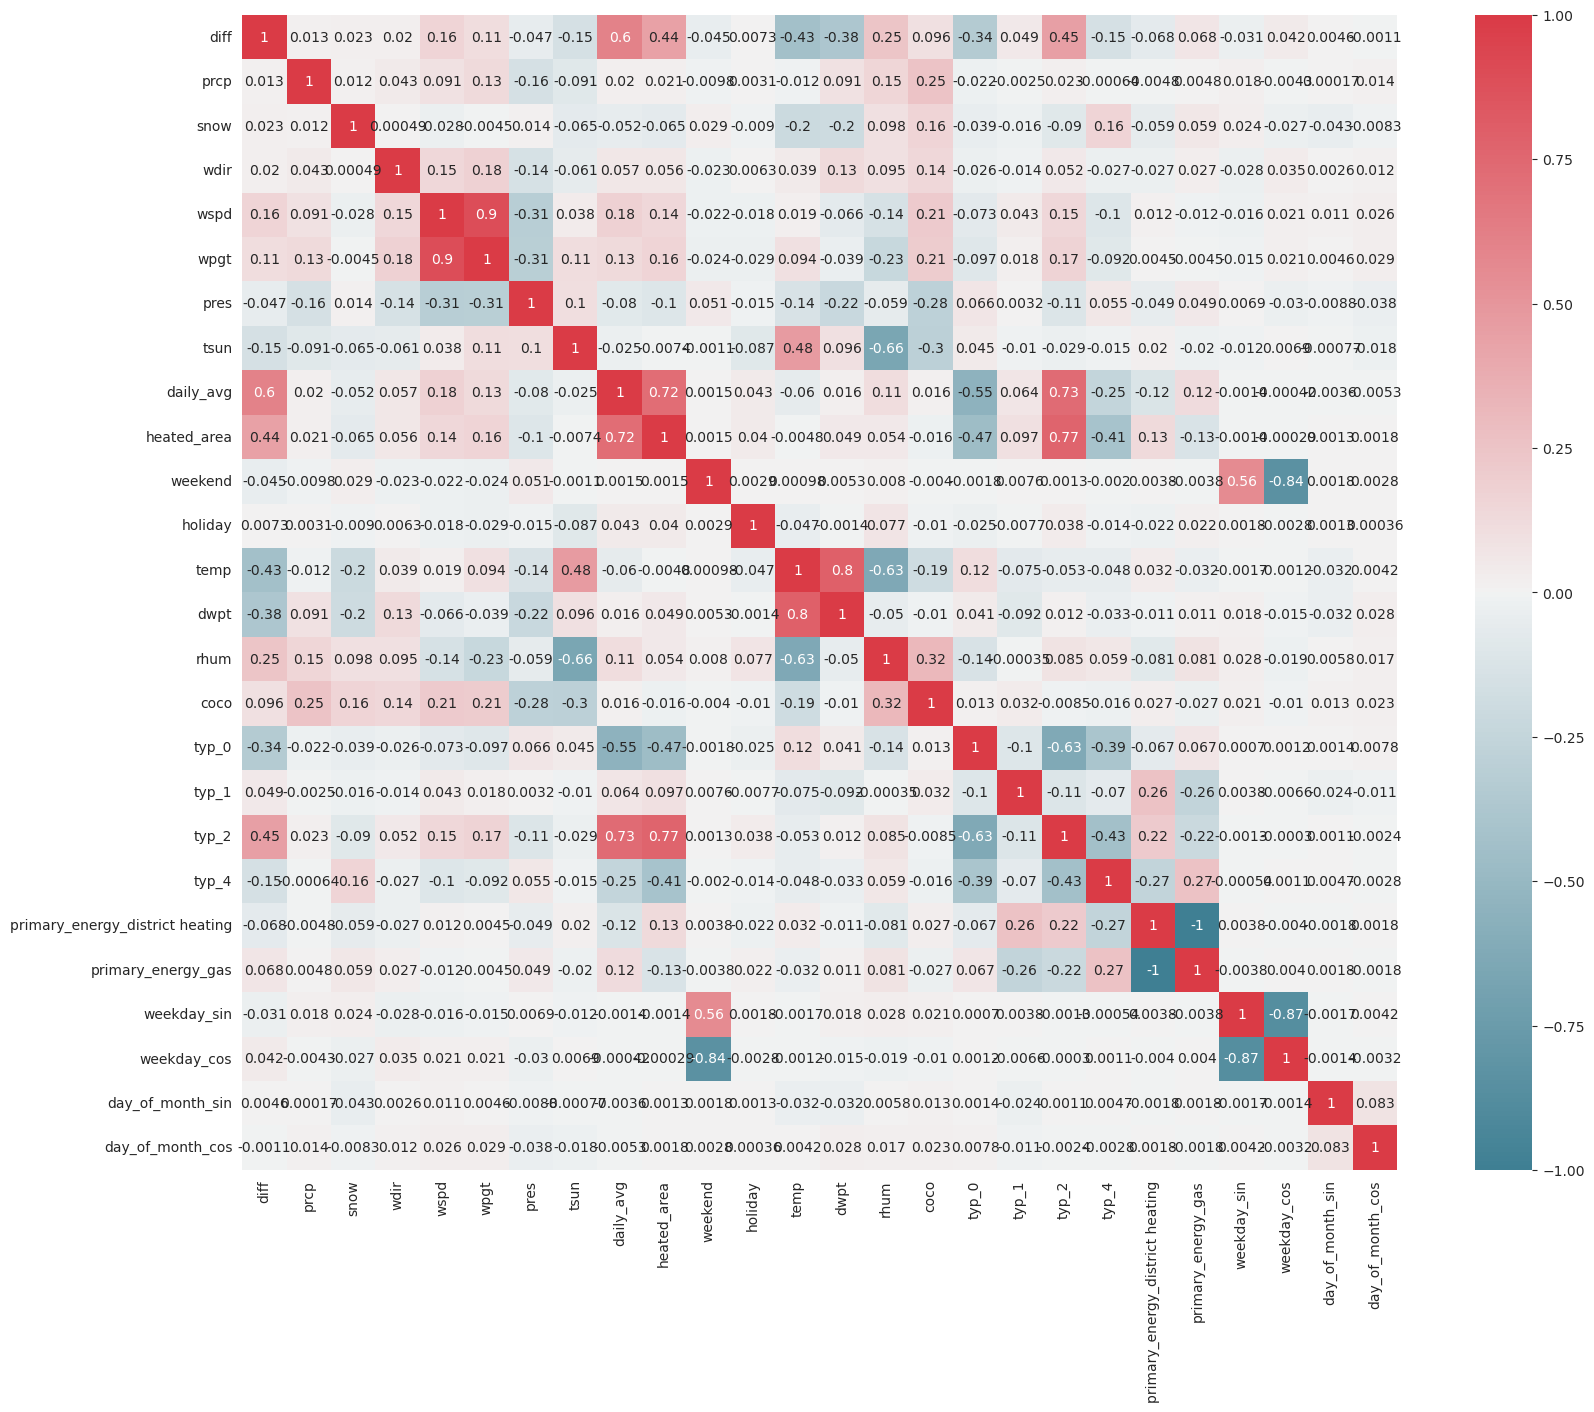

In [9]:
from src.energy_forecast.config import FIGURES_DIR
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_hourly.select(attributes).to_pandas().corr()

f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            vmin=-1.0, vmax=1.0,
            square=True, ax=ax,
            annot=True)
plt000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000.savefig(FIGURES_DIR / "correlation_heatmap_hourly.png")

### Per Building

Calculate p-values and r-squared values per building and average over those

In [7]:
def get_p_vals_id(df, attributes):
    sensor_list = list()
    for id in df["id"].unique():
        df_s = df.filter(pl.col("id") == id)
        _, r_squared, r_squared_adj, coeffs, p_vals = get_p_vals(df_s, attributes)
        sensor_list.append(
            {"id": id, "r_s": r_squared, "r_s_adj": r_squared_adj, "p_vals": p_vals, "p_vals_n": len(p_vals)})
    return pl.DataFrame(sensor_list).drop_nans().filter(pl.col("p_vals_n") == len(attributes))


def get_p_vals_avg(df, attributes):
    df_p_vals = get_p_vals_id(df, attributes)
    print("Average r-squared: ", df_p_vals["r_s"].mean())
    print("Average r-squared adjusted: ", df_p_vals["r_s_adj"].mean())
    avg_p_vals = list(
        df_p_vals["p_vals"].explode().reshape((len(attributes), -1)).to_numpy().sum(axis=1) / len(df_p_vals))
    for attribute, p_val in zip(attributes, avg_p_vals):
        print(f"{attribute}: {p_val}")


get_p_vals_avg(df_hourly.drop_nulls([attributes]), attributes)

Sample size: 1967
Sample size: 11581
Sample size: 13002
Sample size: 2001


/home/marja/anaconda3/envs/energy-forecast/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning:

divide by zero encountered in scalar divide

/home/marja/anaconda3/envs/energy-forecast/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning:

divide by zero encountered in scalar divide

/home/marja/anaconda3/envs/energy-forecast/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning:

divide by zero encountered in scalar divide

/home/marja/anaconda3/envs/energy-forecast/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning:

invalid value encountered in scalar divide

/home/marja/anaconda3/envs/energy-forecast/lib/python3.10/site-packages/statsmodels/stats/stattools.py:50: RuntimeWarning:

invalid value encountered in scalar divide

/home/marja/anaconda3/envs/energy-forecast/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1967: 

Sample size: 32
Sample size: 4689
Sample size: 820
Sample size: 1147
Sample size: 1788


/home/marja/anaconda3/envs/energy-forecast/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning:

divide by zero encountered in scalar divide

/home/marja/anaconda3/envs/energy-forecast/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning:

divide by zero encountered in scalar divide

/home/marja/anaconda3/envs/energy-forecast/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning:

divide by zero encountered in scalar divide



Sample size: 213
Sample size: 14872
Sample size: 702
Sample size: 2306
Sample size: 1


/home/marja/anaconda3/envs/energy-forecast/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning:

divide by zero encountered in scalar divide

/home/marja/anaconda3/envs/energy-forecast/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning:

invalid value encountered in divide



ValueError: resids must contain at least 2 elements

The averaged values show that, on average, the features have an r-squared value of about 0.85. Since no feature is significant on average, this might mean that the model is not able to generalize well, but does find significant attributes for each individiual building.